In [2]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14605 sha256=aa16ecebd421a0b13d43c31a163eb4564c864819acc82f4f076118d512a1eddf
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [3]:
from pyforest import *

In [4]:
lazy_imports()

['from sklearn.linear_model import Ridge',
 'import pydot',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import LassoCV',
 'import matplotlib as mpl',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import textblob',
 'from sklearn.linear_model import RidgeCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.model_selection import KFold',
 'from sklearn.impute import SimpleImputer',
 'import spacy',
 'from scipy import stats',
 'import imutils',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.decomposition import PCA',
 'import nltk',
 'import tqdm',
 'import pickle',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.cluster import KMeans',
 'import datetime as dt',

In [5]:
df=pd.read_csv('/content/BankNote_Authentication.csv')
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [10]:
df.shape

(1372, 5)

In [8]:
# Where we can tell that class 0 reprsents Genuine/Not Fake and class 1 Fake.
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
cor=df.corr()
cor

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<IPython.core.display.Javascript object>

<Axes: >

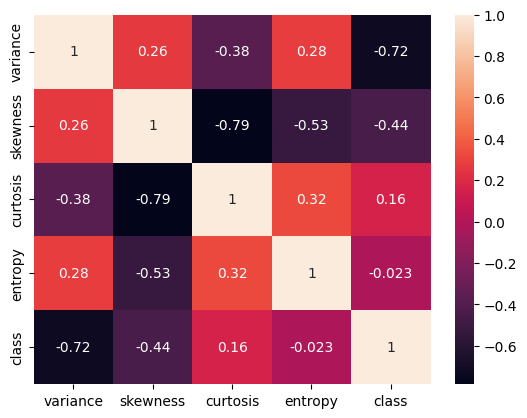

In [11]:
sns.heatmap(cor,annot=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

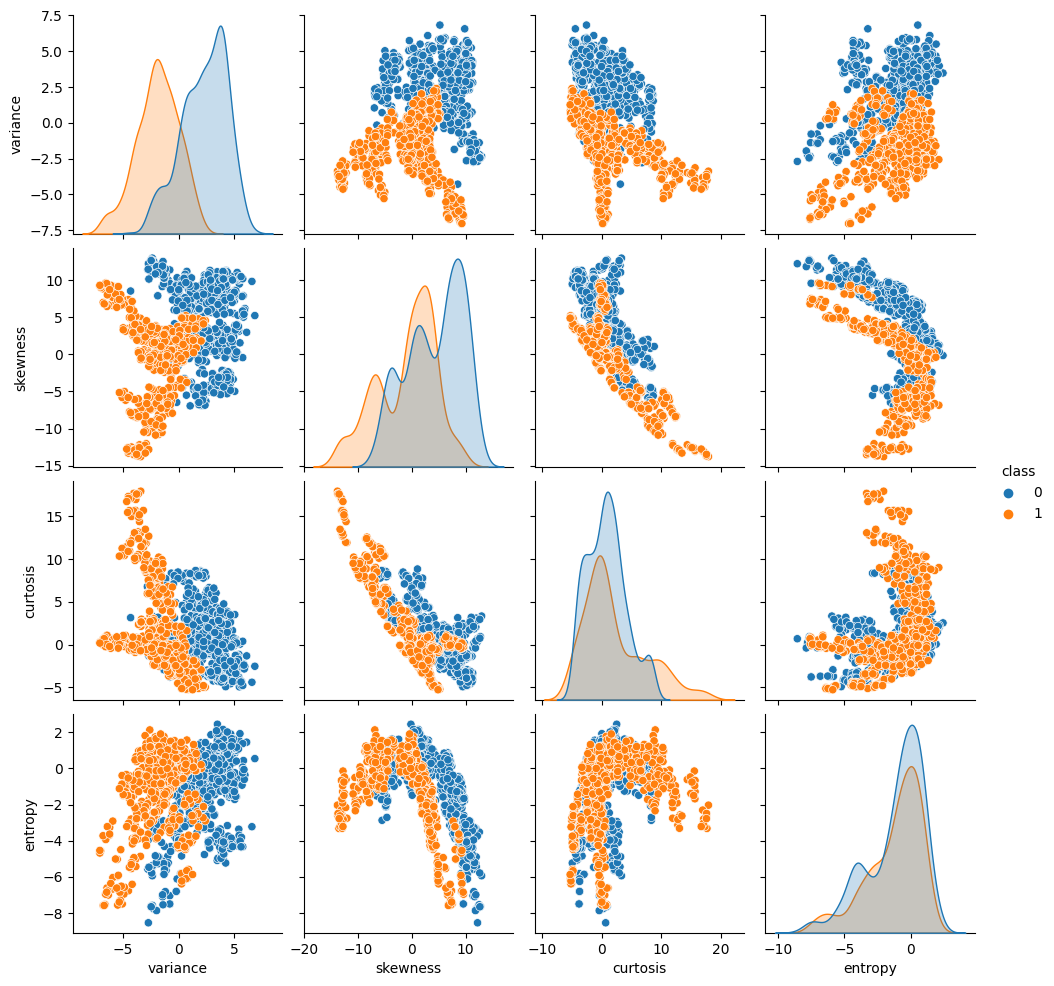

In [20]:
sns.pairplot(df,hue='class')
plt.show()

# Mostly there is no correlation between attributes(zero correlation)

In [13]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-19-e0bb4c6e3e29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'],color='red')


<IPython.core.display.Javascript object>

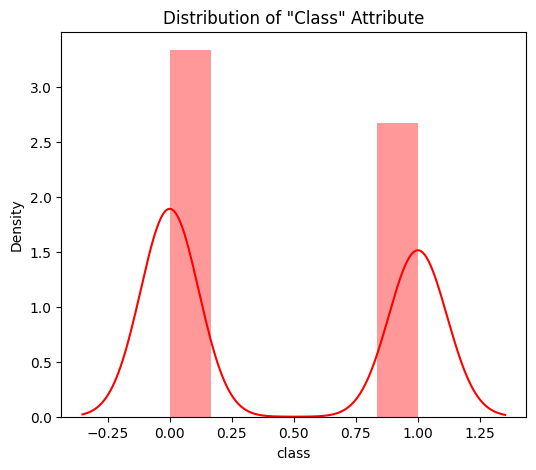

In [19]:
plt.figure(figsize=(6,5))
plt.title('Distribution of "Class" Attribute')
sns.distplot(df['class'],color='red')
plt.show()

In [14]:
# split the data
x=df.drop('class',axis=1)
y=df['class']

In [27]:
# Where we need to normalize the data there is high range and variance we are seen between all attribute values.
scale=StandardScaler()
x_scaled=scale.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=['variance', 'skewness', 'curtosis', 'entropy'])
x_scaled.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [28]:
#split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

<IPython.core.display.Javascript object>

In [68]:
# Model Building
model=LogisticRegression(solver='liblinear',random_state=42)
model.fit(x_train,y_train)
accuracy=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
print("Accuracy_Score:",accuracy.mean())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9890492076730609


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

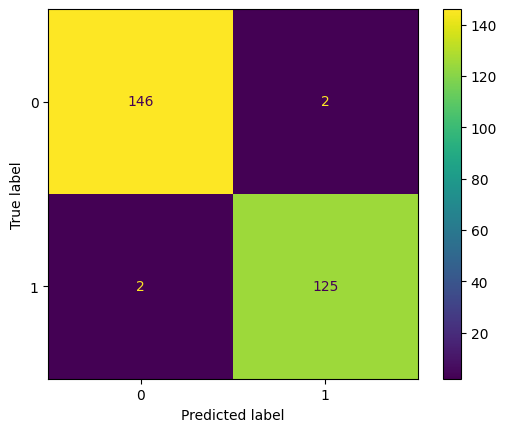

In [69]:
y_pred=model.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=model.classes_)
dis=metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
dis.plot()

In [71]:
from sklearn.svm import SVC
model2=SVC(kernel='rbf')
model2.fit(x_train,y_train)
accuracy=cross_val_score(estimator=model2,X=x_train,y=y_train,cv=10)
print("Accuracy_Score:",accuracy.mean())

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9954462051709758


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

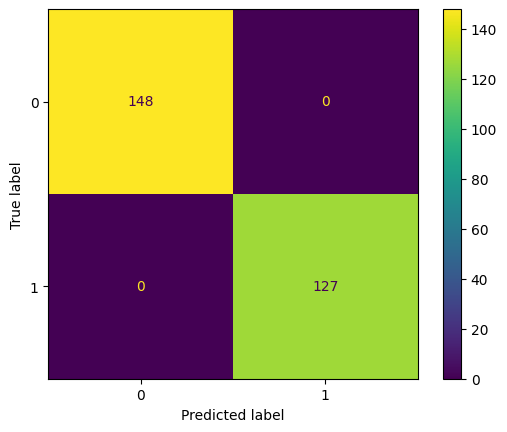

In [72]:
y_pred=model2.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=model2.classes_)
dis=metrics.ConfusionMatrixDisplay(cm,display_labels=model2.classes_)
dis.plot()

In [74]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(criterion='entropy',random_state=42)
model3.fit(x_train,y_train)
accuracy=cross_val_score(estimator=model3,X=x_train,y=y_train,cv=10)
print('Accuracy_Score:',accuracy.mean())

<IPython.core.display.Javascript object>

Accuracy_Score: 0.9899749791492912


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

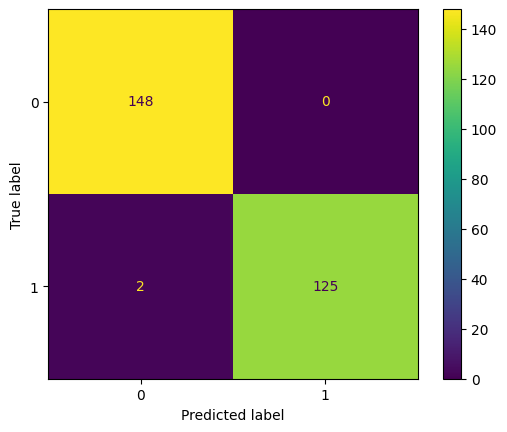

In [75]:
y_pred=model3.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=model3.classes_)
dis=metrics.ConfusionMatrixDisplay(cm,display_labels=model3.classes_)
dis.plot()

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV
parameters={'leaf_size':[2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2],}
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [77]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [78]:
model4=KNeighborsClassifier(n_neighbors=2,leaf_size=2,p=1)
model4.fit(x_train,y_train)
accuracy=cross_val_score(estimator=model4,X=x_train,y=y_train,cv=10)
print('Accuracy_Score:',accuracy.mean())

<IPython.core.display.Javascript object>

Accuracy_Score: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

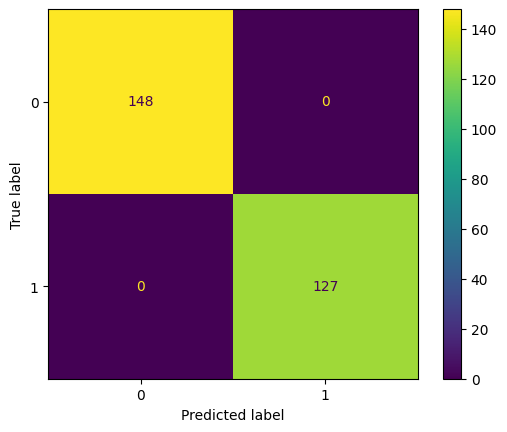

In [79]:
y_pred=model4.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=model4.classes_)
dis=metrics.ConfusionMatrixDisplay(cm,display_labels=model4.classes_)
dis.plot()

In [81]:
# Multilayer Perception
from sklearn.neural_network import MLPClassifier
model5=MLPClassifier(max_iter=8000,solver='sgd',alpha=0.0001,random_state=42)
model5.fit(x_train,y_train)

MLPClassifier(max_iter=8000, random_state=42, solver='sgd')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

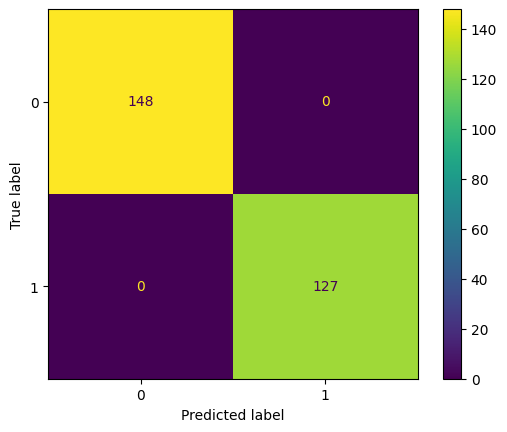

In [82]:
y_pred=model5.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred,labels=model5.classes_)
dis=metrics.ConfusionMatrixDisplay(cm,display_labels=model5.classes_)
dis.plot()